In [1]:
import sys
sys.path.append('C:/Users/pradnya.gade/Projects')

from pydiSQL import pull_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
query = """
SELECT DISTINCT(sus.school_id),
               du.user_id,
               cco.neat_career_category AS career,
               dc.country
FROM analytics.sub_ux_school AS sus
	LEFT JOIN twinkl.twinkl_school_user AS tsu
		ON sus.school_id = tsu.school_id
	LEFT JOIN analytics.dx_user AS du
		ON tsu.user_id = du.user_id
	LEFT JOIN analytics.career_category_overview AS cco
		ON du.career_category_id = cco.id
	LEFT JOIN analytics.dx_country AS dc
		ON du.country_id = dc.country_id
WHERE CURDATE() BETWEEN sus.ux_start_date AND sus.ux_end_date;
"""

In [3]:
df = pull_data(query)

c:\ProgramData\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Server connected via SSH


In [4]:
df.head(100)

,school_id,user_id,career,country
0,1,696515.0,EAL Teacher,Scotland
1,1,696516.0,Home Educator,Scotland
2,1,1234421.0,Trainee,Scotland
3,1,4128677.0,SEN Teacher,Scotland
4,1,14483764.0,KS1 Teacher (or equivalent),Scotland
...,...,...,...,...
95,38,895516.0,Speech and Language therapist,England
96,38,3892018.0,Early Years Teacher,England
97,38,3892019.0,KS1 Teacher (or equivalent),England
98,38,4971444.0,KS1 Teacher (or equivalent),England


In [5]:
len(df)

194840

In [6]:
df.country.nunique()

160

In [7]:
df.career.nunique()

32

In [8]:
df[df.user_id.isnull()]

,school_id,user_id,career,country
4540,642,NaN,None,None
5282,724,NaN,None,None
7073,934,NaN,None,None
8453,1114,NaN,None,None
11167,1407,NaN,None,None
...,...,...,...,...
194570,24453,NaN,None,None
194787,24484,NaN,None,None
194821,24489,NaN,None,None
194822,24490,NaN,None,None


In [9]:
df[df.school_id == 188]

,school_id,user_id,career,country
1232,188,433018.0,Early Years Teacher,England
1233,188,433019.0,KS3 Teacher (or equivalent),England
1234,188,433023.0,KS2 Teacher (or equivalent),England
1235,188,433025.0,KS2 Teacher (or equivalent),England
1236,188,433027.0,KS1 Teacher (or equivalent),England
1237,188,1101463.0,KS2 Teacher (or equivalent),England
1238,188,1109384.0,Teaching Assistant,England
1239,188,1289210.0,KS2 Teacher (or equivalent),England
1240,188,1327558.0,KS2 Teacher (or equivalent),England
1241,188,1446816.0,Trainee,England


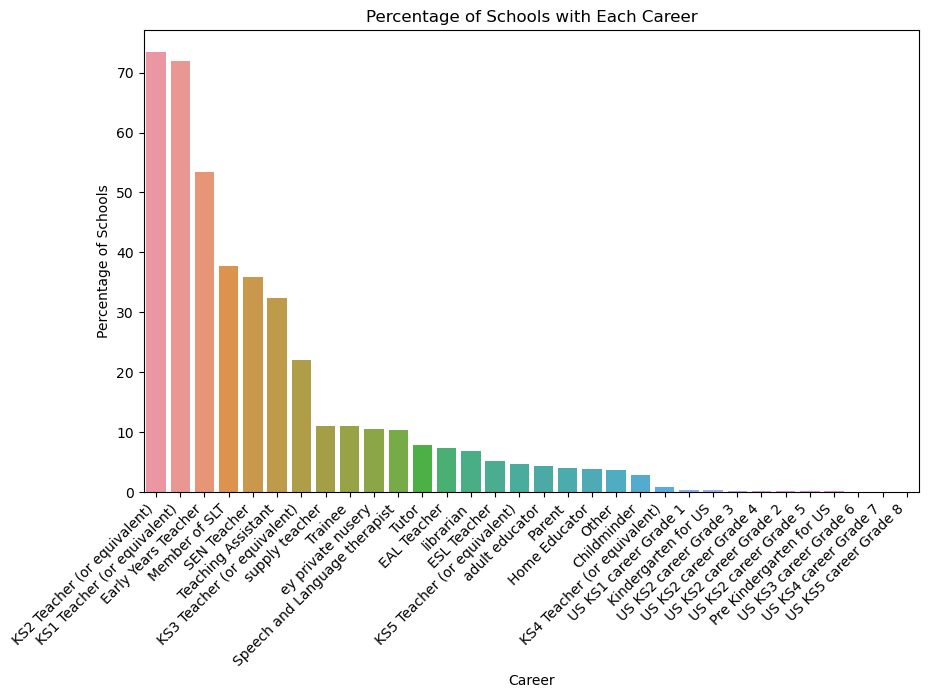

In [10]:
# Career breakdown of active schools
career_breakdown = df.groupby('career')['school_id'].nunique() / df['school_id'].nunique() * 100

# Sort career_breakdown in descending order
career_breakdown = career_breakdown.sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=career_breakdown.index, y=career_breakdown.values)
plt.title('Percentage of Schools with Each Career')
plt.xlabel('Career')
plt.ylabel('Percentage of Schools')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
# how many are select other careers apart from "teacher"

# Create a boolean mask for careers not containing 'teacher' (handling missing values)
mask = df['career'].apply(lambda x: isinstance(x, str) and 'teach' not in x.lower() if x else True)

# Calculate the percentage of careers not containing 'teacher'
percentage_not_teacher = (mask.sum() / len(df['career'].dropna())) * 100

# Display the result
print(f"Percentage of careers not containing 'teacher': {percentage_not_teacher:.2f}%")



Percentage of careers not containing 'teacher': 21.45%


In [40]:
# Grouping by 'school_id' and 'career', and counting the number of occurrences
career_counts = (
    df
    .groupby(['school_id', 'career'])['user_id']
    .count()
    .reset_index(name='count')
)

career_counts[career_counts.school_id == 188]

,school_id,career,count
436,188,Early Years Teacher,2
437,188,KS1 Teacher (or equivalent),4
438,188,KS2 Teacher (or equivalent),15
439,188,KS3 Teacher (or equivalent),3
440,188,Teaching Assistant,1
441,188,Trainee,1


In [50]:
# Looking at average users of each career in schools
average_career = (
    career_counts
    .groupby('career')['count']
    .mean()
    .reset_index(name='average')
    .round({'average': 1})
    .sort_values(by='average', ascending=False)
)

average_career

,career,average
6,KS2 Teacher (or equivalent),4.0
15,SEN Teacher,3.2
7,KS3 Teacher (or equivalent),3.2
5,KS1 Teacher (or equivalent),3.0
8,KS4 Teacher (or equivalent),2.3
2,ESL Teacher,2.3
3,Early Years Teacher,2.0
16,Speech and Language therapist,1.8
17,Teaching Assistant,1.8
10,Kindergarten for US,1.6


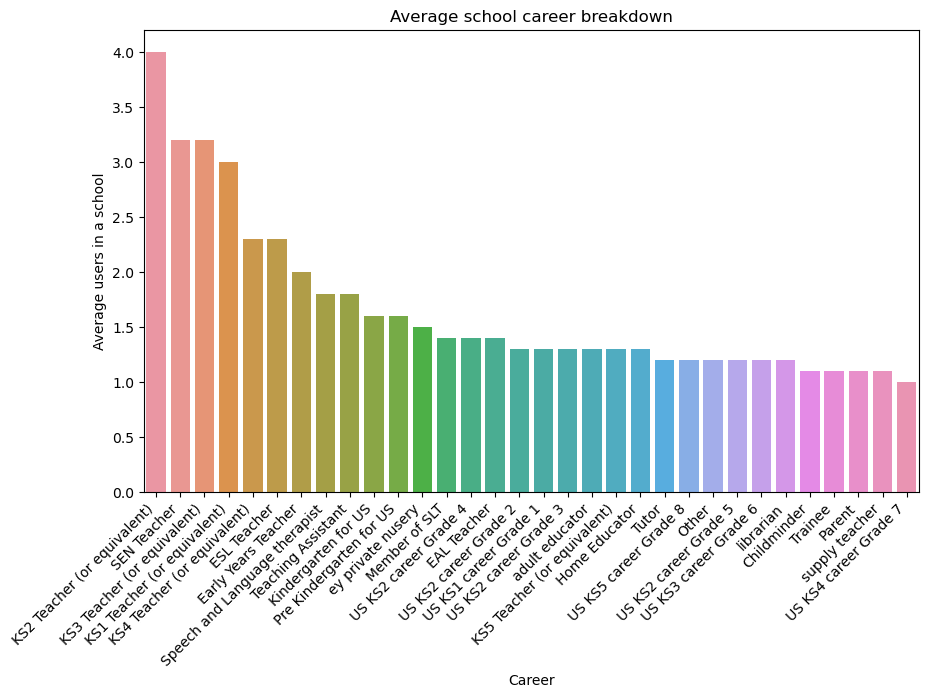

In [51]:
# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_career.career, y=average_career.average)
plt.title('Average school career breakdown')
plt.xlabel('Career')
plt.ylabel('Average users in a school')
plt.xticks(rotation=45, ha='right')
plt.show()